In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
iris=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris.csv')


Mounted at /content/drive


In [ ]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split    # import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X=iris.drop(columns=['variety'])
y = iris['variety']

**Checking Missing Values**

In [ ]:
iris.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

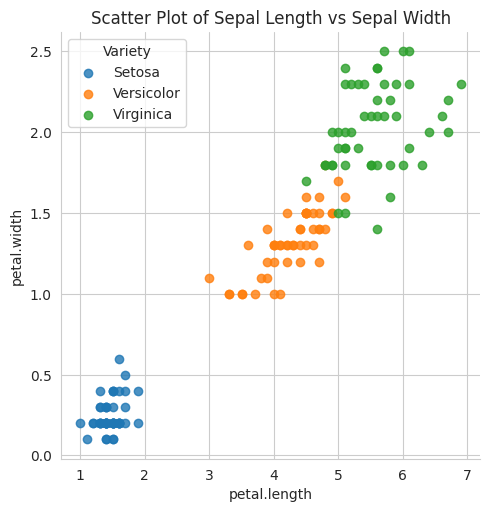

In [ ]:

sns.set_style("whitegrid")

sns.lmplot(x='petal.length', y='petal.width', data=iris, hue='variety', fit_reg=False, legend=False)
plt.title("Scatter Plot of Sepal Length vs Sepal Width")
plt.legend(title="Variety")
plt.show()

Scatter Plot:Setosa have smaller petal width and length and virginica have higher petal length and width

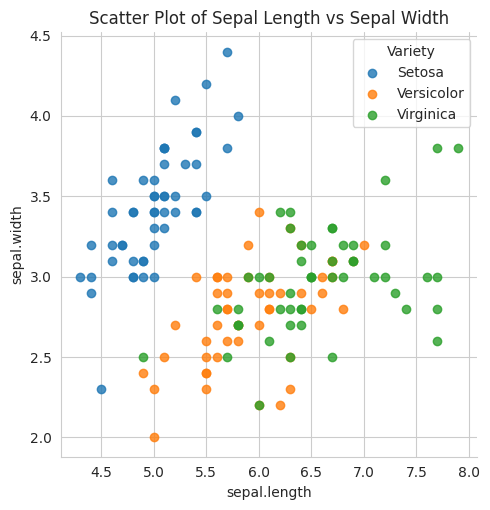

In [ ]:

sns.set_style("whitegrid")

sns.lmplot(x='sepal.length', y='sepal.width', data=iris, hue='variety', fit_reg=False, legend=False)
plt.title("Scatter Plot of Sepal Length vs Sepal Width")
plt.legend(title="Variety")
plt.show()

**Splitting the dataset**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=42) # Splitting the dataset into 80 - 20

**Implemendation of KNN**

In [ ]:
k=3
knn = KNeighborsClassifier(n_neighbors=k)

In [ ]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
accuracy=accuracy_score(Y_test, y_pred)
report= classification_report(Y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [ ]:
class_counts = iris['variety'].value_counts()
class_counts

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

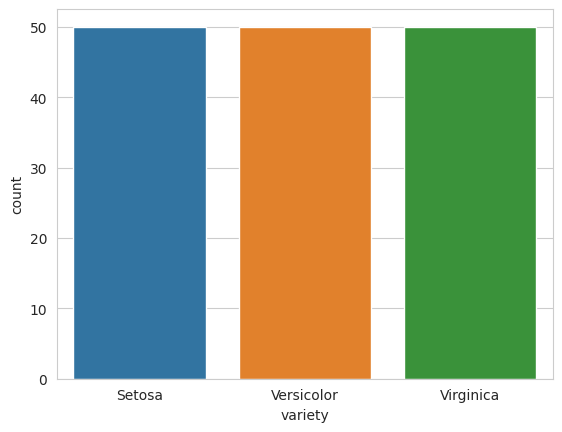

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='variety', data=iris)
plt.show()


Every Class Label(Setosa,Versicolor,Virginica) has equal count of 50

In [ ]:
import csv
import math
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

def load_data(filename):
    dataset = []
    class_encoding = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}
    with open(filename, 'r') as file:
        lines = csv.reader(file)
        next(lines)
        for row in lines:
            row[-1] = class_encoding[row[-1]]
            dataset.append([float(x) for x in row])
    return dataset

# calculate distance using Euclidean distance
def euclidean_distance(point1, point2):
    distance = 0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i]) ** 2
    return math.sqrt(distance)

#find neighrous neighbor
def get_neighbors(train_data, test_data, k):
    distances = []
    for row in train_data:
        dist = euclidean_distance(test_data, row)
        distances.append((row, dist))
    distances.sort(key=lambda x: x[1])
    neighbors = [x[0] for x in distances[:k]]
    return neighbors

#predicting based on vote
def predict_classification(neighbors):
    class_votes = {}
    for neighbor in neighbors:
        target = neighbor[-1]
        if target in class_votes:
            class_votes[target] += 1
        else:
            class_votes[target] = 1
    sorted_votes = sorted(class_votes.items(), key=lambda x: x[1], reverse=True)
    return sorted_votes[0][0]

#evaluate the model to get accuracy
def evaluate_model(train_data, test_data, k):
    correct = 0
    for row in test_data:
        neighbors = get_neighbors(train_data, row, k)
        predicted_class = predict_classification(neighbors)
        if predicted_class == row[-1]:
            correct += 1
    accuracy = (correct / float(len(test_data))) * 100.0
    return accuracy

# Define the file path in your Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/iris.csv'

data = load_data(file_path)

# Split the data into training and test sets
split_ratio = 0.8
split = int(len(data) * split_ratio)
train_data = data[:split]
test_data = data[split:]

#Assign value of K
k = 3

correct = 0
for row in test_data:
    neighbors = get_neighbors(train_data, row, k)
    predicted_class = predict_classification(neighbors)
    if predicted_class == row[-1]:
        correct += 1

accuracy = (correct / float(len(test_data))) * 100.0
print(f'Accuracy: {accuracy:.2f}%')

new_data_point = [6.6, 2.9, 4.6, 1.3]
k = 3
neighbors = get_neighbors(train_data, new_data_point, k)
predicted_class = predict_classification(neighbors)
variety_mapping = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
predicted_variety = variety_mapping[predicted_class]

print(f'Predicted Variety: {predicted_variety}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy: 100.00%
Predicted Variety: Versicolor
